# Homework 4 - Decision Trees / Random Forests

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's the same data set as from HW3, so that way you'll be familiar with it.

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival
- Find if there are any important features related to patient survival

In this assignment, we will be using Clustering to identify clusters of patients, then seeing how well the various clustering methods work against the true clusters (classes). A good resource to use would be [Sci-Kit Learn's Clustering info](https://scikit-learn.org/stable/modules/clustering.html)

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW4.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using. Add any you want to use.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own.


In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc
from sklearn.metrics import accuracy_score
# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data to remember what it looks like:

In [2]:
heart_df = pd.read_csv('E:/code/spring23/COSC3337/data_sets/data_hw4.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

In this HW, since you've had plenty of experience with visual analysis in general and on this data set, we are going to skip this part.

### Part 2: Clustering

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be entirely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

Your checklist of items to do will be as such:

1. Scale the data (5 pts)
2. Split it into training/testing sets (5 pts)
3. Cluster the patients using the 3 methods imported from sklearn.clustering (see above) (40 pts)
- As a note, you'll want to try and optimize the parameters within these models to have good accuracy as well as good generalization (no overfitting). 
- Also, if you can, try and rank your features to get a kind of feature importance (Think about how you might do this. There are multiple ways to do it.)
4. Write a report, which should have ample information on your methods, implementation, results, and various graphs/charts explaining how your model performed. How could you visualize the clusters or how well they performed? What issues might they have? What are some pros and cons of different methods? How well do your clustering results match the true clusters (classes)? The report has the following criteria (50 pts): 
- Should be at LEAST 2-3 paragraphs, and a paragraph is more than just 2-3 sentences.
- Explain your methods, including optimization techniques and WHY you used them
- Contain at LEAST 3 charts/graphs showcasing how well your methods predicted heart disease
- Remember, this is a data science project, so you should be thinking and exploring your data and models. What does the data tell us?

On this HW, it is very difficult to copy your friends, as it will be obvious. Cheating will result in an automatic zero, so make sure your work is original. The point of these HW assignments is for you to think, so if you simply tell me what you did or type definitions of methods to make your report seem long, you will lose points. Each HW assignment is graded in detail.

### Data Overview
The dataset provided contains information on several factors that can contribute to heart disease such as age, anaemia, diabetes, smoking, high blood pressure and much more. The reasons to use this dataset is to explore the factors that could contribute to a patient having heart disease and determine which patients are more likely to die from heart disease. We will be using clustering techniques to identify patterns in the dataset and find factors most associated with heart disease.


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Methods
The dataset contains 299 patients and 13 variables that are factors that lead to heart disease. The variables for the dataset are age, anaemia, creatinine phosphokinase, diabetes, ejection fraction, high blood pressure, platelets, serum creatinine, serum sodium, sex, smoking, time and the target variable death. Before performing the clustering methods the data was preprocessed by scaling the variables using the MinMaxScaler and performed PCA to identify which variables contribute the most variablity to the dataset.After scaling the data it was then split in training and test sets with 80/20 split.

In [4]:
x = heart_df.drop("death", axis = 1).values
y = heart_df["death"]
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ["P1","P2"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_principal, y, test_size=0.2)

### K-Means Clustering
The first thing to perform with K-Means Clustering is to find the optimal k-cluster. The way to find the optimal k is to run KMeans through a range of number and fit the training data. The optimal cluster will be found using the Elbow method. The best k-value will be the one close to the elbow of the plot since it will not overfit with the data.

In [7]:
sse  = []
silscores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train,y_train)
    sse.append(kmeans.inertia_)
    silscores.append(silhouette_score(x_train,kmeans.labels_))

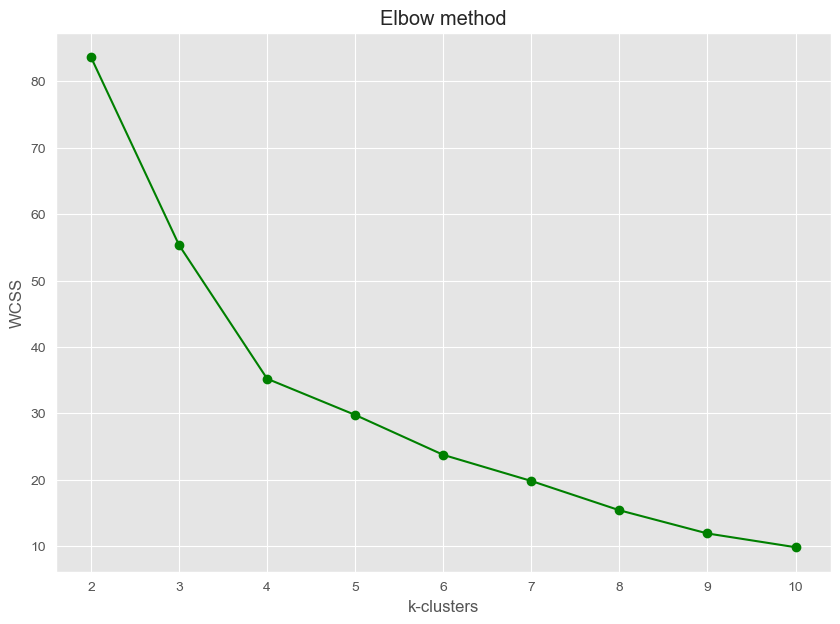

In [8]:
plt.plot(range(2,11), sse, marker = "o", color = "green")
plt.title("Elbow method")
plt.xlabel("k-clusters")
plt.ylabel("WCSS")
plt.show()

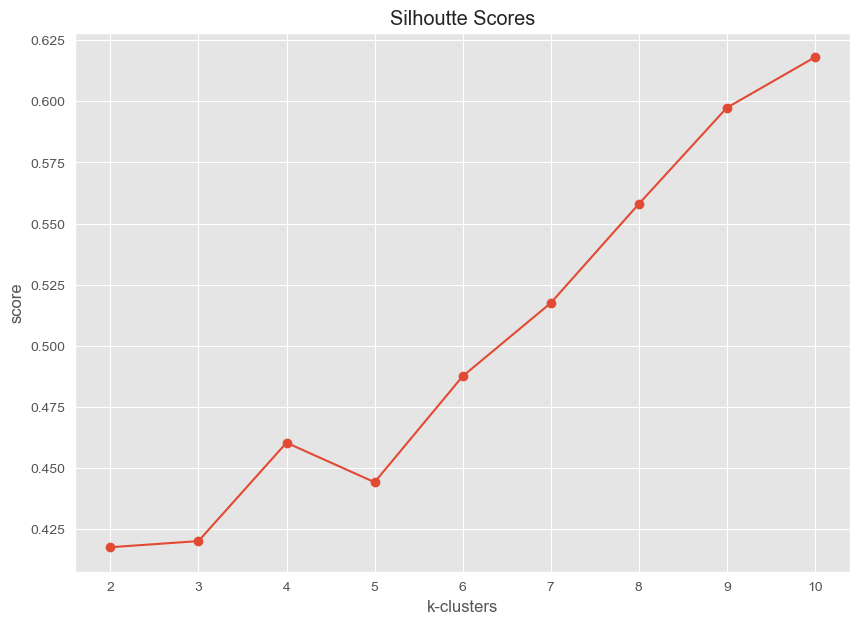

In [9]:
plt.plot(range(2,11),silscores,marker = "o")
plt.title("Silhoutte Scores")
plt.xlabel("k-clusters")
plt.ylabel("score")
plt.show()

In [10]:
kmean = KMeans(n_clusters=4,init="k-means++", random_state=666).fit(x_scaled)
pred_kmean = kmean.predict(x_scaled)
#confusion_matrix(y_test,pred_kmean)

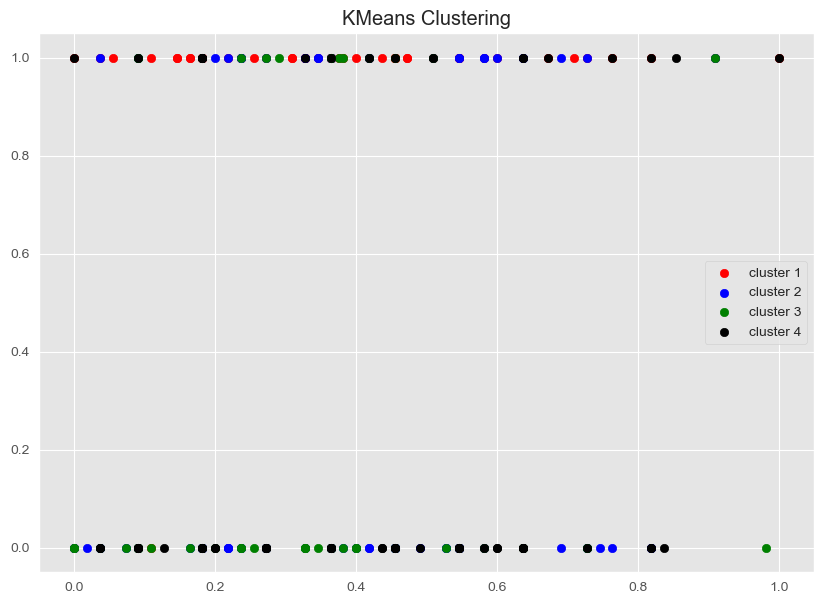

In [11]:
plt.scatter(x_scaled[pred_kmean==0,0], x_scaled[pred_kmean==0,1],c="red",label = "cluster 1")
plt.scatter(x_scaled[pred_kmean==1,0], x_scaled[pred_kmean==1,1],c="blue",label = "cluster 2")
plt.scatter(x_scaled[pred_kmean==2,0], x_scaled[pred_kmean==2,1],c="green",label = "cluster 3")
plt.scatter(x_scaled[pred_kmean==3,0], x_scaled[pred_kmean==3,1],c="black",label = "cluster 4")
plt.legend()
plt.title("KMeans Clustering")
plt.show()

### DBSCAN

In [12]:
#DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster = dbscan.fit_predict(x_principal)
dbscan.labels_

array([0, 0, 1, 0, 2, 3, 0, 0, 4, 3, 3, 5, 0, 0, 6, 0, 0, 0, 6, 2, 6, 7,
       3, 8, 2, 0, 6, 0, 0, 0, 4, 0, 7, 2, 4, 8, 4, 7, 8, 9, 5, 4, 0, 4,
       2, 0, 0, 0, 0, 4, 0, 6, 9, 7, 4, 0, 5, 5, 5, 0, 4, 4, 1, 0, 4, 1,
       2, 5, 4, 8, 1, 0, 1, 0, 1, 5, 0, 8, 0, 4, 4, 1, 2, 0, 7, 0, 0, 4,
       4, 0, 0, 8, 4, 0, 2, 0, 4, 4, 7, 2, 0, 0, 1, 1, 4, 0, 0, 4, 1, 0,
       1, 1, 8, 4, 4, 4, 7, 4, 7, 4, 3, 7, 9, 6, 0, 4, 2, 2, 5, 4, 3, 4,
       4, 5, 1, 0, 2, 0, 9, 0, 0, 4, 9, 6, 3, 1, 1, 0, 0, 0, 4, 4, 5, 0,
       6, 4, 4, 1, 0, 3, 0, 5, 5, 2, 8, 2, 1, 8, 9, 4, 0, 1, 3, 0, 0, 5,
       1, 4, 4, 1, 8, 0, 0, 0, 5, 4, 4, 9, 7, 4, 8, 4, 4, 0, 0, 0, 2, 4,
       7, 0, 0, 4, 0, 5, 5, 2, 4, 0, 2, 2, 0, 5, 1, 7, 0, 0, 4, 6, 4, 2,
       0, 1, 5, 0, 8, 9, 5, 0, 4, 4, 4, 1, 0, 5, 5, 0, 0, 0, 2, 5, 2, 0,
       1, 6, 8, 4, 0, 0, 1, 9, 4, 9, 0, 2, 0, 0, 4, 4, 4, 1, 0, 4, 4, 2,
       8, 5, 1, 4, 9, 8, 0, 9, 4, 0, 0, 4, 4, 8, 2, 9, 8, 1, 1, 1, 0, 4,
       0, 9, 9, 4, 9, 0, 0, 0, 0, 4, 9, 1, 1], dtyp

In [13]:
db_pred = dbscan.fit_predict(x_principal)
silhouette_avg = silhouette_score(x_principal, db_pred)
print("Silhouette score:", silhouette_avg)
db_score = davies_bouldin_score(x_principal, db_pred)
print("DB index:", db_score)


Silhouette score: 0.46057902625469266
DB index: 0.7267509043541021


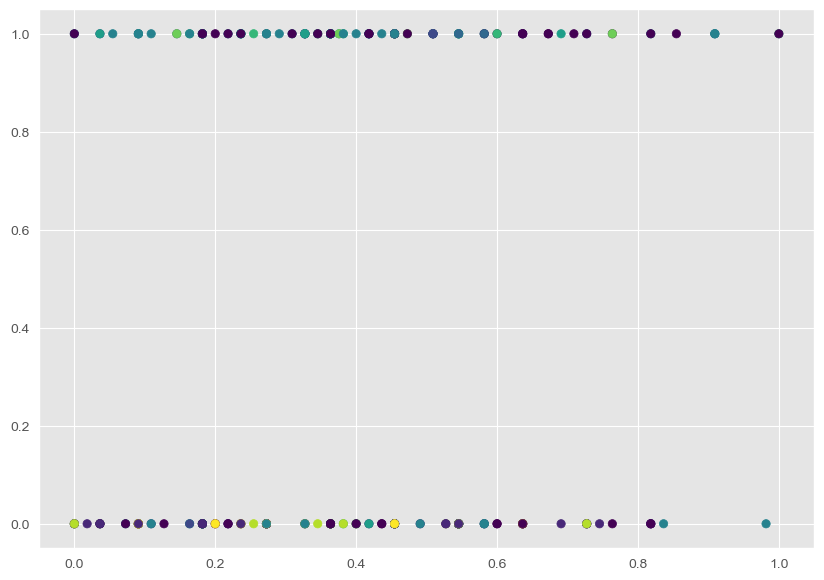

In [14]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=cluster, cmap='viridis')

### Agglomerative Clustering
To find the optimal k values which will cut the tree into a smaller tree. Plotting the clusters with a dendogram and and also checking the silhouette score for different k-clusters.By looking at the dendogram the best cut seems to be at the value 2 which most of the data is still present and also does not overfit the dataset. The silhouette score also shows the same story from the dendogram in which the optimal cluster seems to be at value 2

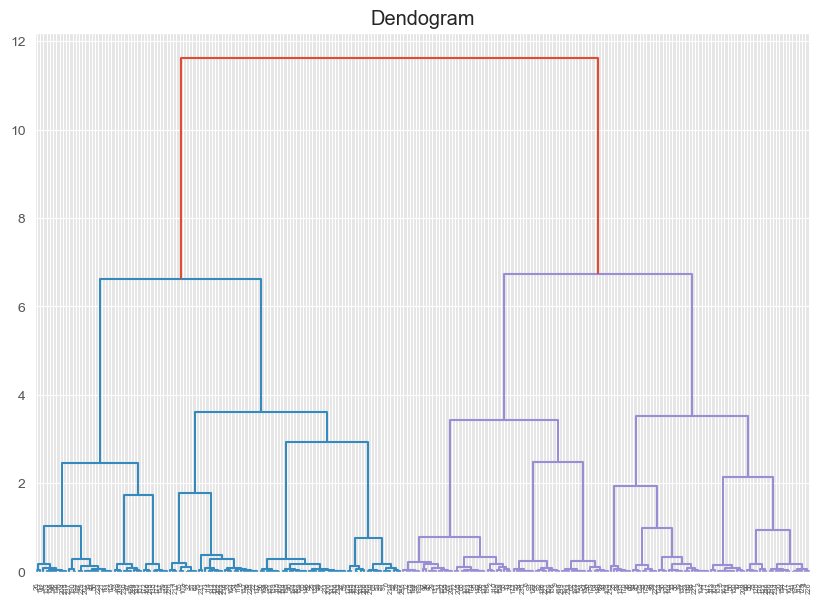

In [15]:
#Hierarchical Clustering
plt.title("Dendogram")
dend = shc.dendrogram((shc.linkage(x_train, method="ward")))

<BarContainer object of 6 artists>

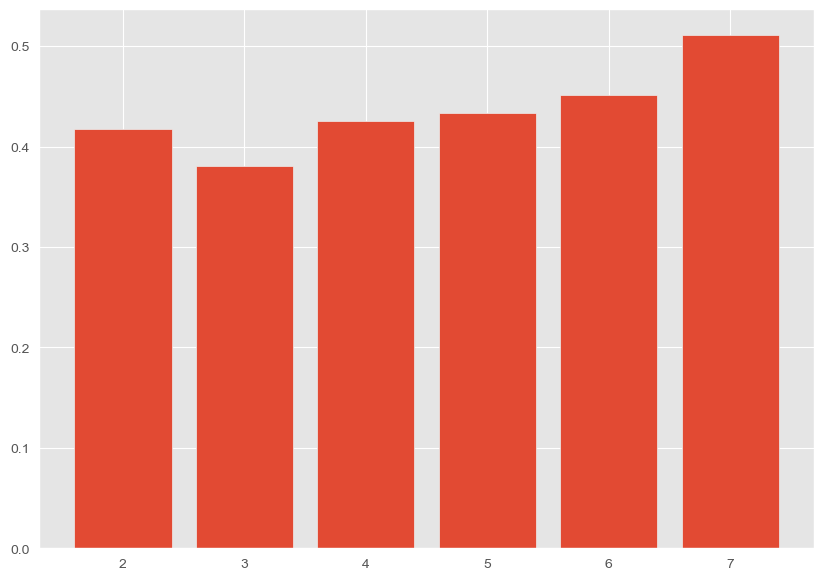

In [16]:
sil_score = []
for i in range(2,8):
    sil_score.append(silhouette_score(x_train,
                                      AgglomerativeClustering(n_clusters=i).fit_predict(x_train,y_train)))
    
plt.bar(x = range(2,8), height = sil_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


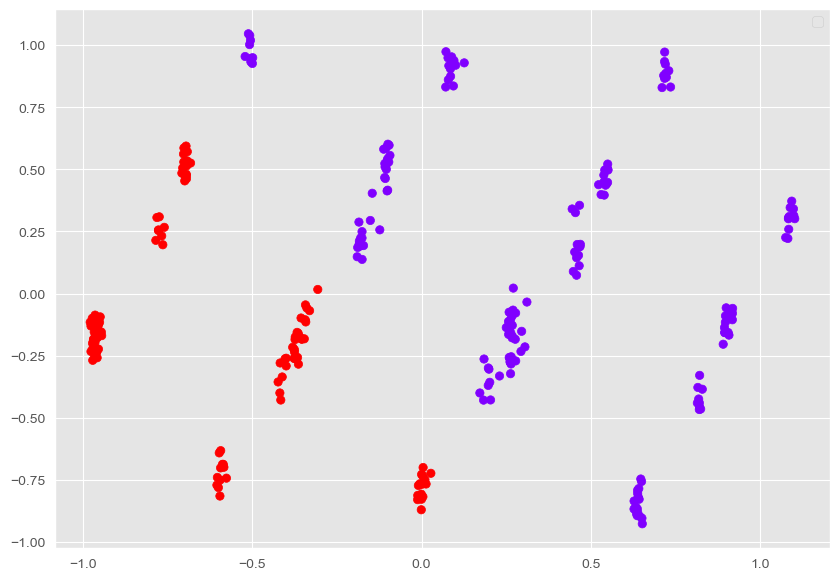

In [17]:
agg = AgglomerativeClustering(n_clusters=2)
plt.scatter(x_principal["P1"],x_principal["P2"],c = agg.fit_predict(x_principal), cmap="rainbow")
plt.legend()
plt.show()

### Results
The clustering results for the K-means clustering and DBSCAN were evaluated using the silhoutte scores and Agglomerative Clustering was evaluated using silhoutte scores and plotting the clusters. The KMeans clustering was optimized by using the elbow method with the WCSS scores and the optimal cluster was with the value 4 and also had the best peforming silhouttes scores out of the three clustering methods. The worst performing algorithm was the Agglomerative Clusting which produced the lowest silhouttes scores out of the three clustering methods and the clusters were not very close to each other. While DBSCAN silhoutte scores were very similar to KMeans clustering scores.

The pros and cons of KMeans cluster is that is easy to implement and is computationally fast compared to the other methods and some cons are that KMeans is sensitive to initialization of cluster centers.The pros of DBSCAN  is that it does not require prior knowledge of number of clusters and some cons are that DBSCAN  is very computationally expensive on large datasets so it would be better to use smaller dataset. The pros of Agglomerative Clustering it also does not require prior knowledge of number of clusters and visually much easier to find the optimal parameters for the algorithm by looking at the dendogram and silhoutte scores. The cons of this algorithm are that is very computationally expensive on large datasets and also sensitive on the choice of linkage for the clustering.